#### Code by Maiara Figueredo, Larissa Evaldt and Patricia Correia

# Feature engineering of houses dataset

Before starting using our data for modeling, one critical first step in preparing the data, that is where feature engineering comes to the scenario. Feature engineering is one of the most critical steps in putting machine learning into practice.

Feature engineering transforms raw data, which means taking whatever knowledge you have about your problem and converting it into numbers that you can use to construct your feature matrix.

First of all, we will take a lot at the data.


In [1]:
import pandas as pd

Import the dataset

In [4]:
df = pd.read_csv("data/final_df.csv")

In [5]:
df.head()

,ID,Luas_quantity,Bus_quantity,Train_quantity,PS_quantity,SS_quantity,Garda_quantity,Date of Sale,Price,Not Full Market Price,VAT Exclusive,Description of Property,Longitude,Latitude
0,0,0,32,0,1,0,0,2017-01-01,242424.0,Yes,No,Second-Hand Dwelling house /Apartment,-6.181405,53.362710
1,1,0,32,0,1,0,0,2017-01-01,242424.0,Yes,No,Second-Hand Dwelling house /Apartment,-6.181405,53.362710
2,2,0,34,0,1,0,0,2017-01-01,66000.0,Yes,No,Second-Hand Dwelling house /Apartment,-6.182833,53.362984
3,3,0,32,0,1,0,0,2017-01-01,271800.0,Yes,No,Second-Hand Dwelling house /Apartment,-6.181405,53.362710
4,4,0,33,0,1,0,0,2017-01-01,830000.0,No,No,Second-Hand Dwelling house /Apartment,-6.181892,53.365139


Check the information about the dataset, so we can start our feature engineering.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46404 entries, 0 to 46403
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       46404 non-null  int64  
 1   Luas_quantity            46404 non-null  int64  
 2   Bus_quantity             46404 non-null  int64  
 3   Train_quantity           46404 non-null  int64  
 4   PS_quantity              46404 non-null  int64  
 5   SS_quantity              46404 non-null  int64  
 6   Garda_quantity           46404 non-null  int64  
 7   Date of Sale             46404 non-null  object 
 8   Price                    46404 non-null  float64
 9   Not Full Market Price    46404 non-null  object 
 10  VAT Exclusive            46404 non-null  object 
 11  Description of Property  46404 non-null  object 
 12  Longitude                46404 non-null  float64
 13  Latitude                 46404 non-null  float64
dtypes: float64(3), int64(7

 We will rename the'Date of Sale' to 'Date_of_Sale, 'Not Full Market Price' to 'Not_full_market_price', 'VAT Exclusive' to 'VAT_exclusive' and 'Description of Property' to 'Description_of_property' columns to eliminate white spaces.

In [7]:
df.rename(columns={'Date of Sale':'Date_of_Sale',
                 'Not Full Market Price':'Not_full_market_price',
                 'VAT Exclusive' : 'VAT_exclusive',
                 'Description of Property': 'Description_of_property'},
         inplace=True)

Check for NaN values

In [8]:
print('Luas_quantity:',df.Luas_quantity.unique())
print('Bus_quantity :',df.Bus_quantity .unique())
print('Train_quantity :',df.Train_quantity.unique())
print('PS_quantity:',df.PS_quantity.unique())
print('SS_quantity:',df.SS_quantity.unique())
print('Garda_quantity:',df.Garda_quantity.unique())
print('Date_of_Sale:',df.Date_of_Sale.unique())
print('Price:',df.Price.unique())
print('Not_full_market_price:',df.Not_full_market_price.unique())
print('VAT_exclusive:',df.VAT_exclusive.unique())
print('Description_of_property :',df.Description_of_property.unique())

Luas_quantity: [ 0 17  8  2  3  4  6 13  7  1 11 12 16 10 18 21  9 14  5 19 20 15 22]
Bus_quantity : [ 32  34  33  36  53  62  15  37  24  48  74 319  95   5  26  65 178 184
  28  45  80  50  49  77  20  55  18  16  21  42  35  19  61 238  44  47
 149  43  52  63  79 119  25  94  31  70  27  64  93  17   1  22  51  46
  67  87  88  30  60 116  71  56  73  75  23 137  39 121 110  68  54 125
   0  72  29  58  92  83  81  89 109   8  40   6 218  38 139  57  76  97
 227 264  10  84 203  14 287 111 143 215 380 196 112 268  78  99 245  41
   2  13  59  66  11 102  91   9 104 135 252 120 155  69 212  98  12 257
 150 292  90 272 357 138 147   3 223 103 107 108 100  86  96 261 253 117
 320 127 159 105 291 322 130 101  85   7 359 183 151 332 189  82 148 106
 134 334 129 317 131 336 185 144 142 132 335 243 114 153 115 353 275 370
 231 280 113 356 204 124 122 249 186 271 339 175 154 190 201 299 157 256
 251 182 171 373 337 170 229 294 259 286 329 152 145 136 224 239 209 164
 304 192 219 146 281 19

After that, change the Not_full_market_price from Yes and No to binary '1' and '0'

In [9]:
df['Not_full_market_price'] = df['Not_full_market_price'].map({'Yes':1, 'No':0})

Following the same logic, we will aplly the binary '1' and '0' to 'VAT_exclusive' Column.

In [10]:
df['VAT_exclusive'] = df['VAT_exclusive'].map({'Yes':1, 'No':0})

The column Description_of_property has some odd character.

In [11]:
df['Description_of_property'].unique().tolist()

['Second-Hand Dwelling house /Apartment',
 'New Dwelling house /Apartment',
 'Teach/�ras�n C�naithe Ath�imhe']

In [12]:
len(df['Description_of_property'].unique().tolist())

3

In [13]:
df['Description_of_property'].value_counts()

Second-Hand Dwelling house /Apartment    35459
New Dwelling house /Apartment            10942
Teach/�ras�n C�naithe Ath�imhe               3
Name: Description_of_property, dtype: int64

However it's only three rows, so we will drop it.

In [14]:
df['Description_of_property'] = df['Description_of_property'].apply(lambda x: x.replace("�", "-"))

In [15]:
df['Description_of_property'].value_counts()

Second-Hand Dwelling house /Apartment    35459
New Dwelling house /Apartment            10942
Teach/-ras-n C-naithe Ath-imhe               3
Name: Description_of_property, dtype: int64

In [16]:
df.drop(df[df.Description_of_property == 'Teach/-ras-n C-naithe Ath-imhe'].index, inplace = True)

In [17]:
df['Description_of_property'].value_counts()

Second-Hand Dwelling house /Apartment    35459
New Dwelling house /Apartment            10942
Name: Description_of_property, dtype: int64

After cheking the data types, it is noticible that 'Date_of_Sale' is object type where it should be Date type. So we will set the correct that.

In [18]:
type(df.Date_of_Sale[0])

str

In [19]:
import numpy as np

In [20]:
df.Date_of_Sale = df.Date_of_Sale.apply(np.datetime64)

Now, we will update the values of Description_of_property, in order to encode this column.

In [21]:
df.head(1)

,ID,Luas_quantity,Bus_quantity,Train_quantity,PS_quantity,SS_quantity,Garda_quantity,Date_of_Sale,Price,Not_full_market_price,VAT_exclusive,Description_of_property,Longitude,Latitude
0,0,0,32,0,1,0,0,2017-01-01,242424.0,1,0,Second-Hand Dwelling house /Apartment,-6.181405,53.36271


In [22]:
df['Description_of_property'] = df['Description_of_property'].replace(['Second-Hand Dwelling house /Apartment'],'Second_Hand_Dwelling_House_Apartment')

In [23]:
df['Description_of_property'] = df['Description_of_property'].replace(['New Dwelling house /Apartment'],'New_Dwelling_House_Apartment')

For this binary endoding we will use OneHotEnconder from skelearn.

In [24]:
from sklearn.preprocessing import OneHotEncoder

oe_style = OneHotEncoder()
oe_results = oe_style.fit_transform(df[["Description_of_property"]])
pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_).head()

,New_Dwelling_House_Apartment,Second_Hand_Dwelling_House_Apartment
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


Will drop the duplicate values and join the data back to the original datset.

In [25]:
df.drop_duplicates(inplace=True)

In [26]:
df = df.join(pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_))

In [27]:
df.head()

,ID,Luas_quantity,Bus_quantity,Train_quantity,PS_quantity,SS_quantity,Garda_quantity,Date_of_Sale,Price,Not_full_market_price,VAT_exclusive,Description_of_property,Longitude,Latitude,"(New_Dwelling_House_Apartment,)","(Second_Hand_Dwelling_House_Apartment,)"
0,0,0,32,0,1,0,0,2017-01-01,242424.0,1,0,Second_Hand_Dwelling_House_Apartment,-6.181405,53.362710,0.0,1.0
1,1,0,32,0,1,0,0,2017-01-01,242424.0,1,0,Second_Hand_Dwelling_House_Apartment,-6.181405,53.362710,0.0,1.0
2,2,0,34,0,1,0,0,2017-01-01,66000.0,1,0,Second_Hand_Dwelling_House_Apartment,-6.182833,53.362984,0.0,1.0
3,3,0,32,0,1,0,0,2017-01-01,271800.0,1,0,Second_Hand_Dwelling_House_Apartment,-6.181405,53.362710,0.0,1.0
4,4,0,33,0,1,0,0,2017-01-01,830000.0,0,0,Second_Hand_Dwelling_House_Apartment,-6.181892,53.365139,0.0,1.0


After the encoding, we will drop the Description_of_property as we don't need it anymore.

In [28]:
df.drop('Description_of_property', inplace=True, axis=1)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46401 entries, 0 to 46403
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   ID                                       46401 non-null  int64         
 1   Luas_quantity                            46401 non-null  int64         
 2   Bus_quantity                             46401 non-null  int64         
 3   Train_quantity                           46401 non-null  int64         
 4   PS_quantity                              46401 non-null  int64         
 5   SS_quantity                              46401 non-null  int64         
 6   Garda_quantity                           46401 non-null  int64         
 7   Date_of_Sale                             46401 non-null  datetime64[ns]
 8   Price                                    46401 non-null  float64       
 9   Not_full_market_price                  

Will rename the new two columns added '(New_Dwelling_house_Apartment,)' and '(Second_Hand_Dwelling_house_Apartment,)'. And add to a new dataframe.

In [30]:
df = df.rename(columns={ df.columns[13]: "New_Dwelling_House_Apartment" })

In [31]:
df.head(1)

,ID,Luas_quantity,Bus_quantity,Train_quantity,PS_quantity,SS_quantity,Garda_quantity,Date_of_Sale,Price,Not_full_market_price,VAT_exclusive,Longitude,Latitude,New_Dwelling_House_Apartment,"(Second_Hand_Dwelling_House_Apartment,)"
0,0,0,32,0,1,0,0,2017-01-01,242424.0,1,0,-6.181405,53.36271,0.0,1.0


In [32]:
df = df.rename(columns={ df.columns[14]: "Second_Hand_Dwelling_House_Apartment" })

In [33]:
df.head(1)

,ID,Luas_quantity,Bus_quantity,Train_quantity,PS_quantity,SS_quantity,Garda_quantity,Date_of_Sale,Price,Not_full_market_price,VAT_exclusive,Longitude,Latitude,New_Dwelling_House_Apartment,Second_Hand_Dwelling_House_Apartment
0,0,0,32,0,1,0,0,2017-01-01,242424.0,1,0,-6.181405,53.36271,0.0,1.0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46401 entries, 0 to 46403
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   ID                                    46401 non-null  int64         
 1   Luas_quantity                         46401 non-null  int64         
 2   Bus_quantity                          46401 non-null  int64         
 3   Train_quantity                        46401 non-null  int64         
 4   PS_quantity                           46401 non-null  int64         
 5   SS_quantity                           46401 non-null  int64         
 6   Garda_quantity                        46401 non-null  int64         
 7   Date_of_Sale                          46401 non-null  datetime64[ns]
 8   Price                                 46401 non-null  float64       
 9   Not_full_market_price                 46401 non-null  int64         
 10

After check the info in the new dataframe, we could see some NaN values. So, will drop it and add into a new dataframe.

In [35]:
print('New_Dwelling_House_Apartment :',df.New_Dwelling_House_Apartment.unique())
print('Second_Hand_Dwelling_House_Apartment :',df.Second_Hand_Dwelling_House_Apartment.unique())

New_Dwelling_House_Apartment : [ 0.  1. nan]
Second_Hand_Dwelling_House_Apartment : [ 1.  0. nan]


In [36]:
df = df.dropna()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46398 entries, 0 to 46400
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   ID                                    46398 non-null  int64         
 1   Luas_quantity                         46398 non-null  int64         
 2   Bus_quantity                          46398 non-null  int64         
 3   Train_quantity                        46398 non-null  int64         
 4   PS_quantity                           46398 non-null  int64         
 5   SS_quantity                           46398 non-null  int64         
 6   Garda_quantity                        46398 non-null  int64         
 7   Date_of_Sale                          46398 non-null  datetime64[ns]
 8   Price                                 46398 non-null  float64       
 9   Not_full_market_price                 46398 non-null  int64         
 10

In [38]:
print('New_Dwelling_house_Apartment :',df.New_Dwelling_House_Apartment .unique())
print('Second_Hand_Dwelling_house_Apartment :',df.Second_Hand_Dwelling_House_Apartment.unique())

New_Dwelling_house_Apartment : [0. 1.]
Second_Hand_Dwelling_house_Apartment : [1. 0.]


The NaN values are gone. As seen above the datatype is float. Then we will conver that to int.

In [39]:
df[['New_Dwelling_House_Apartment', 'Second_Hand_Dwelling_House_Apartment']] = df[['New_Dwelling_House_Apartment', 'Second_Hand_Dwelling_House_Apartment']].astype(int)

We will drop two columns 'ID' and 'Date_of_sale' because it is not relevant for training the model.

In [40]:
df = df.drop(columns=['ID', 'Date_of_Sale'])

In [41]:
df

,Luas_quantity,Bus_quantity,Train_quantity,PS_quantity,SS_quantity,Garda_quantity,Price,Not_full_market_price,VAT_exclusive,Longitude,Latitude,New_Dwelling_House_Apartment,Second_Hand_Dwelling_House_Apartment
0,0,32,0,1,0,0,242424.0,1,0,-6.181405,53.362710,0,1
1,0,32,0,1,0,0,242424.0,1,0,-6.181405,53.362710,0,1
2,0,34,0,1,0,0,66000.0,1,0,-6.182833,53.362984,0,1
3,0,32,0,1,0,0,271800.0,1,0,-6.181405,53.362710,0,1
4,0,33,0,1,0,0,830000.0,0,0,-6.181892,53.365139,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46396,0,55,0,5,3,1,477000.0,0,0,-6.294334,53.295079,0,1
46397,0,66,0,3,2,1,555000.0,0,0,-6.271758,53.388159,0,1
46398,0,38,0,1,0,0,248500.0,0,0,-6.283514,53.405929,0,1
46399,0,49,1,5,0,0,320000.0,0,0,-6.212927,53.376221,0,1


Let's have a look at price distribution and outliers

In [42]:
df.Price.describe()

count    4.639800e+04
mean     4.527555e+05
std      1.451157e+06
min      5.250000e+03
25%      2.511013e+05
50%      3.303965e+05
75%      4.675000e+05
max      1.391650e+08
Name: Price, dtype: float64

In [43]:
df.Price.min()

5250.0

In [44]:
df.Price.max()

139165000.0

It looks like we have some very odd numbers. Minimum being just over 5 thousand, it doesn't make any sense since no property in Dublin would cost so little. And 139 million euro is a really large, unrealistic value. Let's check price in a box plot

In [45]:
import matplotlib.pyplot as plt 

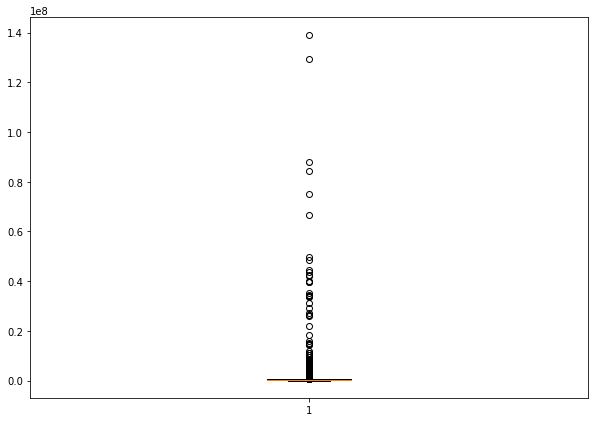

In [46]:
fig = plt.figure(figsize =(10, 7))
  
plt.boxplot(df.Price)
  
plt.show()

We can see that definitelly we have some really large values and that those are outliers. Let's experiment a bit with the data:

In [47]:
df.shape

(46398, 13)

In [48]:
lessthan5000000 = df[df['Price'] < 5000000.0]

In [49]:
lessthan5000000.shape

(46318, 13)

Apparently only 80 rows are over 5 million

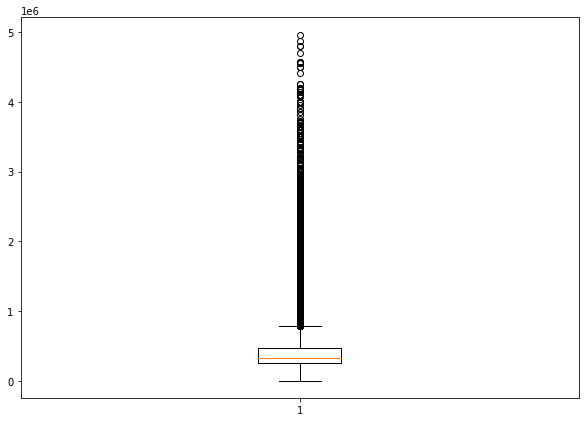

In [50]:
fig = plt.figure(figsize =(10, 7))
  
plt.boxplot(lessthan5000000.Price)
  
plt.show()

Let's see if we use data for prices less than 2 million

In [51]:
lessthan2000000 = df[df['Price'] < 2000000.0]

In [52]:
lessthan2000000.shape

(45943, 13)

Comparing with original dataset, 455 rows were above 2 million

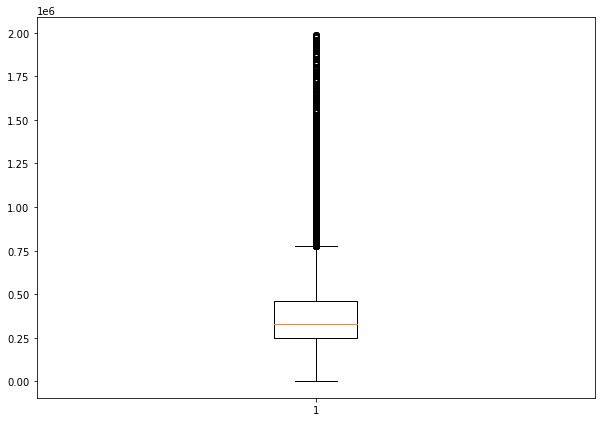

In [53]:
fig = plt.figure(figsize =(10, 7))
  
plt.boxplot(lessthan2000000.Price)
  
plt.show()

Checking less than 1 million

In [54]:
lessthan1000000 = df[df['Price'] < 1000000.0]

In [55]:
lessthan1000000.shape

(44526, 13)

46398 - 44526 = 1872 rows had the price above 1 million

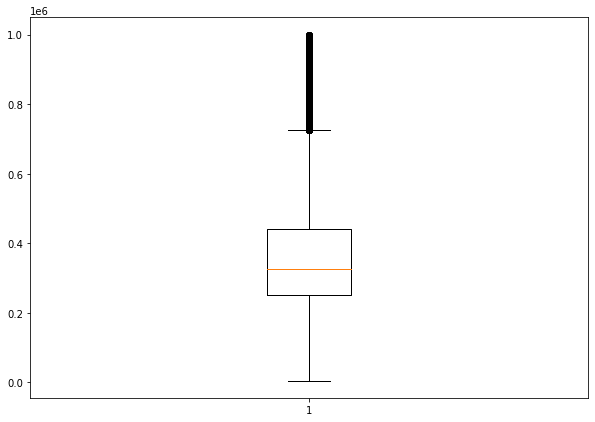

In [56]:
fig = plt.figure(figsize =(10, 7))
  
plt.boxplot(lessthan1000000.Price)
  
plt.show()

Deleting 1872 rows is a lot, let's keep it at maximum 2 million. And let's check the really small values:

In [57]:
reallysmall = df[df['Price'] < 70000.0]

In [58]:
reallysmall

,Luas_quantity,Bus_quantity,Train_quantity,PS_quantity,SS_quantity,Garda_quantity,Price,Not_full_market_price,VAT_exclusive,Longitude,Latitude,New_Dwelling_House_Apartment,Second_Hand_Dwelling_House_Apartment
2,0,34,0,1,0,0,66000.00,1,0,-6.182833,53.362984,0,1
189,0,8,0,1,0,0,25000.00,1,0,-6.094022,53.533258,0,1
249,0,0,0,0,0,0,30000.00,1,0,-6.243575,53.562844,0,1
360,0,19,0,2,2,0,15000.00,1,0,-6.174446,53.406084,0,1
384,4,102,0,8,2,1,40000.00,0,0,-6.271994,53.334701,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44749,0,2,0,0,0,0,54000.00,0,0,-6.097783,53.489312,0,1
44858,0,42,0,2,1,0,30000.00,1,0,-6.132789,53.253156,0,1
45082,4,76,0,4,2,1,57500.00,1,0,-6.267361,53.322393,0,1
45278,0,32,1,1,1,1,53000.00,0,0,-6.184652,53.610700,0,1


There are 414 rows that are have the price less than 70 thousand euro. That's a little bit unrealistic for anyone to buy a property for less than 70 thousand in Dublin. So we will keep our dataset with values from over 70 thousand to less than 2 million:

In [59]:
df = df[df['Price'] > 70000.0]

In [60]:
df = df[df['Price'] < 2000000.0]

In [61]:
df.shape

(45515, 13)

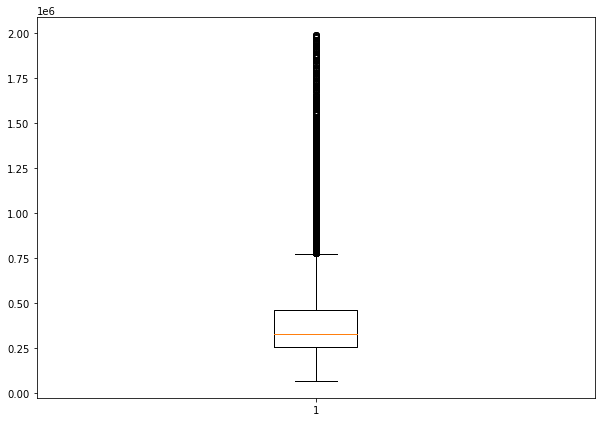

In [62]:
fig = plt.figure(figsize =(10, 7))
  
plt.boxplot(df.Price)
  
plt.show()

Now let's have a look at Not_full_market_price

In [63]:
df['Not_full_market_price'].value_counts()

0    43528
1     1987
Name: Not_full_market_price, dtype: int64

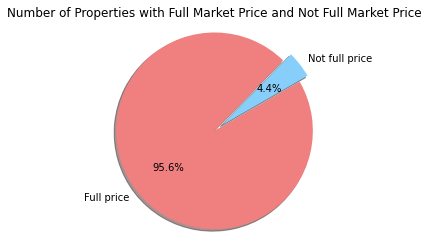

In [64]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Not full price', 'Full price'
colors = ['lightskyblue', 'lightcoral']
sizes = [1987, 43528]
explode = (0.1, 0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, colors=colors, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=30)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Number of Properties with Full Market Price and Not Full Market Price')
plt.show()

4.4% of the entries are marked to be Not Full Market Price.
All the explanation there was in the Property Price Register website about column 'Not Full Market Price':
* In a small number of transactions included in the Register the price shown does not represent the full market price of the property concerned for a variety of reasons. All such properties are marked **.

Since these not full market price don't represent the real price, we will be keeping only full market price properties and deleting this Not_Full_Market_Price column:

In [65]:
df2 = df[df['Not_full_market_price'] == 0]

In [66]:
df2['Not_full_market_price'].value_counts()

0    43528
Name: Not_full_market_price, dtype: int64

In [67]:
df2 = df2.drop(columns=['Not_full_market_price'])

In [68]:
df2.shape

(43528, 12)

Now let's have a look at new_Dwelling vs Second_Hand properties

In [69]:
df2['New_Dwelling_House_Apartment'].value_counts()

0    33156
1    10372
Name: New_Dwelling_House_Apartment, dtype: int64

Because these columns were encoded using one hot encoding, we know that everything that is 0 for new dwelling is second hand. So let's see it in a Pie chart:

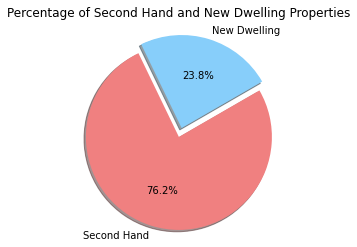

In [70]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'New Dwelling', 'Second Hand'
colors = ['lightskyblue', 'lightcoral']
sizes = [10372, 33156]
explode = (0.1, 0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, colors=colors, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=30)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of Second Hand and New Dwelling Properties')
plt.show()

About 3/4 of our dataset was second hand houses/apartments and 1/4 was new houses/apartments

Let's check the 'VAT Exclusive' column, the explanation in the Property Price Register : 
* If the property is a new property, the price shown should be exclusive of VAT at 13.5%.
I guess that means all new properties are VAT Exclusive = yes and second hand are VAT exclusive = no. Let's check if this assumption is right:

In [71]:
df2['VAT_exclusive'].value_counts()

0    33082
1    10446
Name: VAT_exclusive, dtype: int64

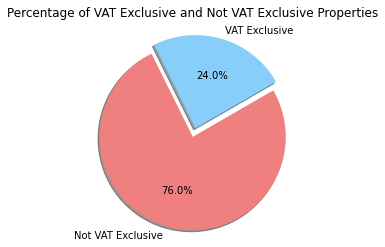

In [72]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'VAT Exclusive', 'Not VAT Exclusive'
colors = ['lightskyblue', 'lightcoral']
sizes = [10446, 33082]
explode = (0.1, 0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, colors=colors, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=30)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of VAT Exclusive and Not VAT Exclusive Properties')
plt.show()

It seems there is a little bit more values for VAT Exclusive than new dwellings. So our assumption is probably not correct, but let's look further:

In [73]:
vat_exclusive_new_dwelling = df2[(df2['VAT_exclusive'] == 1) & (df2['New_Dwelling_House_Apartment'] == 1)]

In [74]:
vat_exclusive_new_dwelling.shape

(5293, 12)

In [75]:
vat_exclusive_second_hand = df2[(df2['VAT_exclusive'] == 1) & (df2['Second_Hand_Dwelling_House_Apartment'] == 1)]

In [76]:
vat_exclusive_second_hand.shape

(5153, 12)

Approximately half of the VAT exclusive rows were second hand and half were new dwellings. So it's not just all new dwellings that are vat exclusive. We will just be leaving this as is

Let's have a look at Latitude and Longitude:

In [77]:
df2.Latitude.describe()

count    43528.000000
mean        53.321151
std          0.969011
min        -37.857255
25%         53.293951
50%         53.342788
75%         53.387985
max         56.415157
Name: Latitude, dtype: float64

In [78]:
df2.Longitude.describe()

count    43528.000000
mean        -6.388826
std          3.555182
min       -122.675026
25%         -6.329320
50%         -6.258684
75%         -6.200129
max        152.972980
Name: Longitude, dtype: float64

We seem to have a few wrong values. Latitude for Dublin should start with 53 and Longitude with -6. So let's check how many are wrong:

In [79]:
latitude_over54 = df2[(df2['Latitude'] > 54)]

In [80]:
latitude_over54.shape

(20, 12)

In [81]:
latitude_over54

,Luas_quantity,Bus_quantity,Train_quantity,PS_quantity,SS_quantity,Garda_quantity,Price,VAT_exclusive,Longitude,Latitude,New_Dwelling_House_Apartment,Second_Hand_Dwelling_House_Apartment
1034,0,0,0,0,0,0,550000.00,0,-5.945565,54.254686,0,1
1276,0,0,0,0,0,0,118942.73,1,-7.458984,55.084809,1,0
1452,0,0,0,0,0,0,375000.00,0,-4.414893,54.734836,0,1
2172,0,0,0,0,0,0,950000.00,0,-8.050000,55.016667,0,1
15174,0,0,0,0,0,0,400000.00,0,-6.200400,54.100730,1,0
15710,0,0,0,0,0,0,180000.00,0,-5.928531,54.602857,0,1
17575,0,0,0,0,0,0,220000.00,0,-1.643186,54.998993,1,0
23916,0,0,0,0,0,0,150000.00,0,-7.312264,54.051399,0,1
26499,0,0,0,0,0,0,320000.00,0,-4.320162,55.949972,0,1
26524,0,0,0,0,0,0,310000.00,0,-4.320162,55.949972,0,1


In [82]:
latitude_less53 = df2[(df2['Latitude'] < 53)]

In [83]:
latitude_less53.shape

(104, 12)

In [84]:
latitude_less53

,Luas_quantity,Bus_quantity,Train_quantity,PS_quantity,SS_quantity,Garda_quantity,Price,VAT_exclusive,Longitude,Latitude,New_Dwelling_House_Apartment,Second_Hand_Dwelling_House_Apartment
304,0,0,0,0,0,0,178000.0,0,-9.064087,52.944822,0,1
682,0,0,0,0,0,0,1325000.0,0,-104.998435,39.746438,0,1
2051,0,0,0,0,0,0,225000.0,0,151.138977,-33.962720,0,1
2080,0,0,0,0,0,0,605000.0,0,-98.343535,30.762355,0,1
2886,0,0,0,0,0,0,200000.0,0,-72.942523,40.892240,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
45034,0,0,0,0,0,0,135000.0,0,-103.459067,43.879103,0,1
45180,0,0,0,0,0,0,1625000.0,0,-122.675026,45.505106,0,1
45250,0,0,0,0,0,0,390000.0,0,-80.121095,25.863214,1,0
45461,0,0,0,0,0,0,467480.0,1,-109.758660,42.977849,1,0


In [85]:
longitude_lessminus7 = df2[(df2['Longitude'] < -7)]

In [86]:
longitude_lessminus7.shape

(101, 12)

In [87]:
longitude_lessminus7

,Luas_quantity,Bus_quantity,Train_quantity,PS_quantity,SS_quantity,Garda_quantity,Price,VAT_exclusive,Longitude,Latitude,New_Dwelling_House_Apartment,Second_Hand_Dwelling_House_Apartment
304,0,0,0,0,0,0,178000.00,0,-9.064087,52.944822,0,1
682,0,0,0,0,0,0,1325000.00,0,-104.998435,39.746438,0,1
1276,0,0,0,0,0,0,118942.73,1,-7.458984,55.084809,1,0
2080,0,0,0,0,0,0,605000.00,0,-98.343535,30.762355,0,1
2172,0,0,0,0,0,0,950000.00,0,-8.050000,55.016667,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
45034,0,0,0,0,0,0,135000.00,0,-103.459067,43.879103,0,1
45180,0,0,0,0,0,0,1625000.00,0,-122.675026,45.505106,0,1
45250,0,0,0,0,0,0,390000.00,0,-80.121095,25.863214,1,0
45461,0,0,0,0,0,0,467480.00,1,-109.758660,42.977849,1,0


In [88]:
longitude_greaterminus6 = df2[(df2['Longitude'] > -6)]

In [89]:
longitude_greaterminus6.shape

(28, 12)

In [90]:
longitude_greaterminus6 

,Luas_quantity,Bus_quantity,Train_quantity,PS_quantity,SS_quantity,Garda_quantity,Price,VAT_exclusive,Longitude,Latitude,New_Dwelling_House_Apartment,Second_Hand_Dwelling_House_Apartment
1034,0,0,0,0,0,0,550000.00,0,-5.945565,54.254686,0,1
1452,0,0,0,0,0,0,375000.00,0,-4.414893,54.734836,0,1
2051,0,0,0,0,0,0,225000.00,0,151.138977,-33.962720,0,1
3740,0,0,0,0,0,0,320000.00,0,145.002301,-37.857255,0,1
6399,0,0,0,0,0,0,1146125.00,1,-0.159416,51.641432,1,0
14968,0,0,0,0,0,0,281938.33,1,152.972980,-27.633835,0,1
15710,0,0,0,0,0,0,180000.00,0,-5.928531,54.602857,0,1
17575,0,0,0,0,0,0,220000.00,0,-1.643186,54.998993,1,0
21184,0,0,0,0,0,0,240000.00,0,2.295753,49.894067,0,1
26238,0,0,0,0,0,0,343612.00,1,-0.353133,51.640949,0,1


I will drop these values since Google API did not recognize the address and returned a wrong value for Latitude and Longitude. As we can see there is no Luas, Bus, Train, Secondary school or primary school near those entries

In [91]:
latitude_over54.describe()

,Luas_quantity,Bus_quantity,Train_quantity,PS_quantity,SS_quantity,Garda_quantity,Price,VAT_exclusive,Longitude,Latitude,New_Dwelling_House_Apartment,Second_Hand_Dwelling_House_Apartment
count,20.0,20.0,20.0,20.0,20.0,20.0,2.000000e+01,20.000000,20.000000,20.000000,20.00000,20.00000
mean,0.0,0.0,0.0,0.0,0.0,0.0,3.936130e+05,0.100000,-5.232388,55.193121,0.35000,0.65000
std,0.0,0.0,0.0,0.0,0.0,0.0,3.569133e+05,0.307794,2.176978,0.775423,0.48936,0.48936
min,0.0,0.0,0.0,0.0,0.0,0.0,1.018182e+05,0.000000,-8.529977,54.051399,0.00000,0.00000
25%,0.0,0.0,0.0,0.0,0.0,0.0,2.175000e+05,0.000000,-7.348944,54.701841,0.00000,0.00000
50%,0.0,0.0,0.0,0.0,0.0,0.0,3.165000e+05,0.000000,-4.942970,55.009643,0.00000,1.00000
75%,0.0,0.0,0.0,0.0,0.0,0.0,4.025000e+05,0.000000,-4.320116,55.949972,1.00000,1.00000
max,0.0,0.0,0.0,0.0,0.0,0.0,1.690000e+06,1.000000,-1.615853,56.415157,1.00000,1.00000


In [92]:
latitude_less53.describe()

,Luas_quantity,Bus_quantity,Train_quantity,PS_quantity,SS_quantity,Garda_quantity,Price,VAT_exclusive,Longitude,Latitude,New_Dwelling_House_Apartment,Second_Hand_Dwelling_House_Apartment
count,104.0,104.0,104.0,104.0,104.0,104.0,1.040000e+02,104.000000,104.000000,104.000000,104.000000,104.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,4.107579e+05,0.221154,-56.328222,40.038852,0.211538,0.788462
std,0.0,0.0,0.0,0.0,0.0,0.0,3.239999e+05,0.417034,53.007772,14.670190,0.410377,0.410377
min,0.0,0.0,0.0,0.0,0.0,0.0,1.150000e+05,0.000000,-122.675026,-37.857255,0.000000,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,2.395000e+05,0.000000,-87.346565,38.401070,0.000000,1.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,3.020950e+05,0.000000,-74.701368,40.776030,0.000000,1.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,4.100000e+05,0.000000,-8.560870,49.894067,0.000000,1.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,1.766388e+06,1.000000,152.972980,52.994295,1.000000,1.000000


In [93]:
longitude_lessminus7.describe()

,Luas_quantity,Bus_quantity,Train_quantity,PS_quantity,SS_quantity,Garda_quantity,Price,VAT_exclusive,Longitude,Latitude,New_Dwelling_House_Apartment,Second_Hand_Dwelling_House_Apartment
count,101.0,101.0,101.0,101.0,101.0,101.0,1.010000e+02,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,4.060971e+05,0.207921,-63.547284,42.651330,0.247525,0.752475
std,0.0,0.0,0.0,0.0,0.0,0.0,3.355176e+05,0.407844,38.105272,8.030063,0.433727,0.433727
min,0.0,0.0,0.0,0.0,0.0,0.0,9.500000e+04,0.000000,-122.675026,25.863214,0.000000,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,2.150000e+05,0.000000,-87.788719,39.083997,0.000000,1.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,2.970000e+05,0.000000,-75.118187,40.844985,0.000000,1.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,4.317180e+05,0.000000,-9.381351,52.682823,0.000000,1.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,1.766388e+06,1.000000,-7.312264,55.135019,1.000000,1.000000


In [94]:
longitude_greaterminus6.describe()

,Luas_quantity,Bus_quantity,Train_quantity,PS_quantity,SS_quantity,Garda_quantity,Price,VAT_exclusive,Longitude,Latitude,New_Dwelling_House_Apartment,Second_Hand_Dwelling_House_Apartment
count,28.0,28.0,28.0,28.0,28.0,28.0,2.800000e+01,28.000000,28.000000,28.000000,28.000000,28.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,4.305264e+05,0.178571,14.595326,44.037333,0.214286,0.785714
std,0.0,0.0,0.0,0.0,0.0,0.0,3.247776e+05,0.390021,47.775835,27.371986,0.417855,0.417855
min,0.0,0.0,0.0,0.0,0.0,0.0,1.800000e+05,0.000000,-5.945565,-37.857255,0.000000,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,2.592500e+05,0.000000,-4.320162,49.894067,0.000000,1.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,3.200000e+05,0.000000,-1.616687,53.041960,0.000000,1.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,4.125000e+05,0.000000,2.295753,55.239455,0.000000,1.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,1.690000e+06,1.000000,152.972980,56.415157,1.000000,1.000000


All these Latitudes and Longitudes are definitely wrong, so we will be dropping these entries:

In [95]:
df3 = df2[(df2['Latitude'] > 53)]

In [96]:
df3.shape

(43424, 12)

In [97]:
df3.Latitude.describe()

count    43424.000000
mean        53.352962
std          0.084828
min         53.016029
25%         53.294227
50%         53.342892
75%         53.388046
max         56.415157
Name: Latitude, dtype: float64

In [98]:
df4 = df3[(df3['Latitude'] < 54)]

In [99]:
df4.shape

(43404, 12)

In [100]:
df4.Latitude.describe()

count    43404.000000
mean        53.352114
std          0.073313
min         53.016029
25%         53.294198
50%         53.342823
75%         53.388007
max         53.968158
Name: Latitude, dtype: float64

In [101]:
df5 = df4[(df4['Longitude'] > -7)]

In [102]:
df5.shape

(43393, 12)

In [103]:
df5.Longitude.describe()

count    43393.000000
mean        -6.269044
std          0.113424
min         -6.908180
25%         -6.328327
50%         -6.258499
75%         -6.200048
max          6.440954
Name: Longitude, dtype: float64

In [104]:
df6 = df5[(df5['Longitude'] < -6)]

In [105]:
df6.shape

(43392, 12)

In [106]:
df6.Longitude.describe()

count    43392.000000
mean        -6.269336
std          0.095615
min         -6.908180
25%         -6.328328
50%         -6.258501
75%         -6.200054
max         -6.048917
Name: Longitude, dtype: float64

Comparing number of rows before and after deleting the wrong number for latitude and longitude

In [107]:
df2.shape

(43528, 12)

In [108]:
df6.shape

(43392, 12)

We can see that there was 130 rows deleted. Let's see the final dataset:

In [109]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43392 entries, 4 to 46400
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Luas_quantity                         43392 non-null  int64  
 1   Bus_quantity                          43392 non-null  int64  
 2   Train_quantity                        43392 non-null  int64  
 3   PS_quantity                           43392 non-null  int64  
 4   SS_quantity                           43392 non-null  int64  
 5   Garda_quantity                        43392 non-null  int64  
 6   Price                                 43392 non-null  float64
 7   VAT_exclusive                         43392 non-null  int64  
 8   Longitude                             43392 non-null  float64
 9   Latitude                              43392 non-null  float64
 10  New_Dwelling_House_Apartment          43392 non-null  int32  
 11  Second_Hand_Dwe

In [110]:
df6.describe()

,Luas_quantity,Bus_quantity,Train_quantity,PS_quantity,SS_quantity,Garda_quantity,Price,VAT_exclusive,Longitude,Latitude,New_Dwelling_House_Apartment,Second_Hand_Dwelling_House_Apartment
count,43392.000000,43392.000000,43392.000000,43392.000000,43392.000000,43392.000000,4.339200e+04,43392.000000,43392.000000,43392.000000,43392.000000,43392.000000
mean,1.653231,52.232393,0.413555,3.232117,1.424364,0.397078,4.061754e+05,0.240136,-6.269336,53.352115,0.238293,0.761707
std,3.521235,46.834973,0.744732,2.330548,1.245450,0.650880,2.432843e+05,0.427171,0.095615,0.073166,0.426044,0.426044
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.070000e+04,0.000000,-6.908180,53.149884,0.000000,0.000000
25%,0.000000,25.000000,0.000000,2.000000,0.000000,0.000000,2.599119e+05,0.000000,-6.328328,53.294220,0.000000,1.000000
50%,0.000000,43.000000,0.000000,3.000000,1.000000,0.000000,3.360000e+05,0.000000,-6.258501,53.342823,0.000000,1.000000
75%,2.000000,62.000000,1.000000,4.000000,2.000000,1.000000,4.713656e+05,0.000000,-6.200054,53.388007,0.000000,1.000000
max,22.000000,386.000000,5.000000,13.000000,7.000000,5.000000,1.989282e+06,1.000000,-6.048917,53.968158,1.000000,1.000000


Now that the dataset is ready, will save in a csv file.

In [111]:
df6.to_csv('data_final2.csv')

In [112]:
df6.shape

(43392, 12)

Pati's code:

In [113]:
df7 = df6

In [114]:
df7.shape

(43392, 12)

In [115]:
from scipy.stats import skew
df_num_skew = df7.apply(lambda x: skew(x.dropna()))
df_num_skew = df_num_skew[df_num_skew > .75]

# apply log + 1 transformation for all numeric features with skewnes over .75
df7[df_num_skew.index] = np.log1p(df7[df_num_skew.index])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [116]:
df_num_skew 

Luas_quantity                   2.626222
Bus_quantity                    3.340226
Train_quantity                  2.107112
PS_quantity                     0.869116
SS_quantity                     0.862529
Garda_quantity                  2.009574
Price                           2.440357
VAT_exclusive                   1.216686
Latitude                        1.297513
New_Dwelling_House_Apartment    1.228560
dtype: float64

In [117]:
print(df7.describe(include=['number']).loc[['min','max','mean']].T.sort_values('max'))

                                            min        max       mean
Longitude                             -6.908180  -6.048917  -6.269336
VAT_exclusive                          0.000000   0.693147   0.166450
New_Dwelling_House_Apartment           0.000000   0.693147   0.165172
Second_Hand_Dwelling_House_Apartment   0.000000   1.000000   0.761707
Train_quantity                         0.000000   1.791759   0.248351
Garda_quantity                         0.000000   1.791759   0.252970
SS_quantity                            0.000000   2.079442   0.751933
PS_quantity                            0.000000   2.639057   1.278309
Luas_quantity                          0.000000   3.135494   0.479649
Latitude                               3.991756   4.006754   3.995483
Bus_quantity                           0.000000   5.958425   3.702344
Price                                 11.166215  14.503285  12.783330


In [118]:
corr = df7.corr()

print (corr['Price'].sort_values(ascending=False)[:5], '\n')
print (corr['Price'].sort_values(ascending=False)[-5:])

Price             1.000000
Longitude         0.286374
SS_quantity       0.087932
Train_quantity    0.063644
Bus_quantity      0.035747
Name: Price, dtype: float64 

New_Dwelling_House_Apartment   -0.011517
PS_quantity                    -0.023884
Garda_quantity                 -0.032001
Luas_quantity                  -0.044268
Latitude                       -0.241344
Name: Price, dtype: float64


In [119]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:1201: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


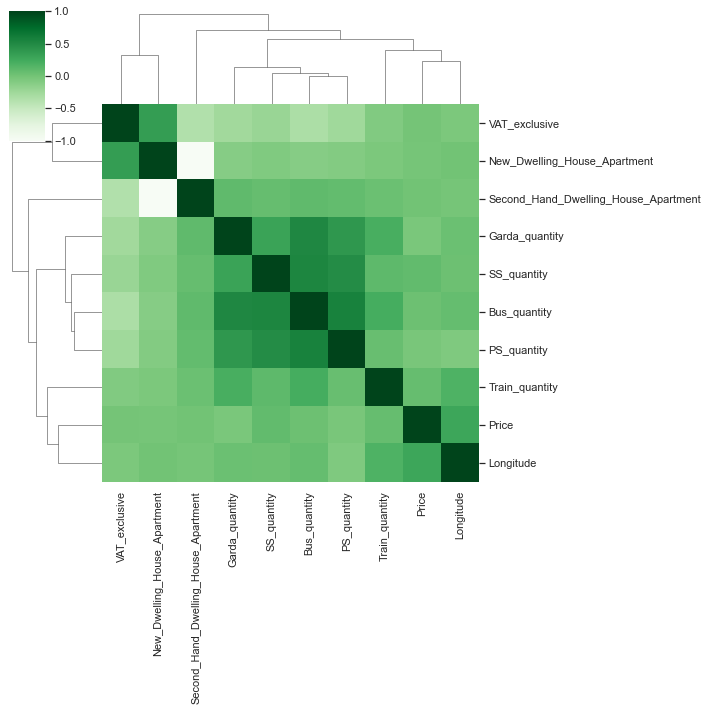

In [120]:
#'Price' Correlation Matrix
k = 10
cols = corr.nlargest(k , 'Price')['Price'].index
cm = np.corrcoef(df7[cols].values.T)
sns.set(font_scale = 1.00)
hm = sns.clustermap(cm , cmap = "Greens",cbar = True,square = True,
                 yticklabels = cols.values, xticklabels = cols.values)

In [121]:
df7.shape

(43392, 12)

In [122]:

# identify outliers with interquartile range
from numpy.random import seed
from numpy.random import randn
from numpy import percentile
# seed the random number generator
seed(1)
# generate univariate observations
df7 = 5 * randn(43392) + 50
# calculate interquartile range
q25, q75 = percentile(df7, 25), percentile(df7, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in df7 if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in df7 if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))



Percentiles: 25th=46.647, 75th=53.371, IQR=6.725
Identified outliers: 315
Non-outlier observations: 43077


In [137]:
df6.head()

,Luas_quantity,Bus_quantity,Train_quantity,PS_quantity,SS_quantity,Garda_quantity,Price,VAT_exclusive,Longitude,Latitude,New_Dwelling_House_Apartment,Second_Hand_Dwelling_House_Apartment
4,0.0,3.526361,0.000000,0.693147,0.000000,0.0,13.629182,0.0,-6.181892,3.995723,0.0,1
8,0.0,3.496508,0.000000,0.693147,0.000000,0.0,12.793862,0.0,-6.181405,3.995678,0.0,1
9,0.0,3.610918,0.000000,0.693147,0.000000,0.0,13.353477,0.0,-6.183087,3.995679,0.0,1
14,0.0,3.988984,0.693147,2.079442,1.098612,0.0,12.468441,0.0,-6.253829,3.995813,0.0,1
15,0.0,4.143135,0.693147,2.079442,1.609438,0.0,12.834684,0.0,-6.238056,3.995727,0.0,1


Now, let’s plot the relationship of our label Price in relation with the features Luas_quantity, Bus_quantity and Train_quantitty, Garda_quantity, PS_quantitity and SS_quantity.

<Figure size 1440x360 with 0 Axes>

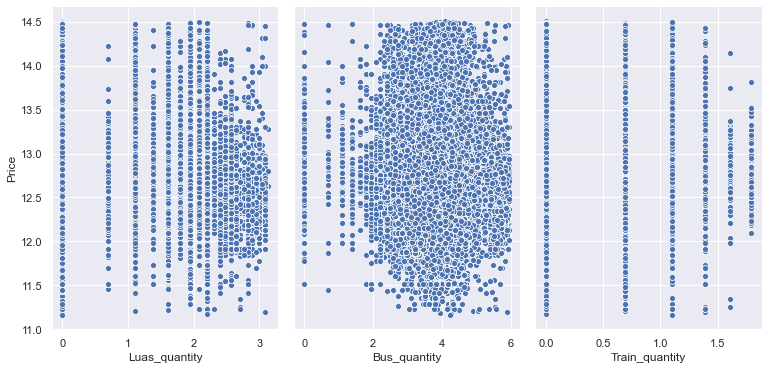

In [148]:
plt.figure(figsize=(20, 5))
sns.pairplot(df6, x_vars=['Luas_quantity', 'Bus_quantity', 'Train_quantity'], y_vars='Price', size=5, aspect=0.7)

<Figure size 1440x360 with 0 Axes>

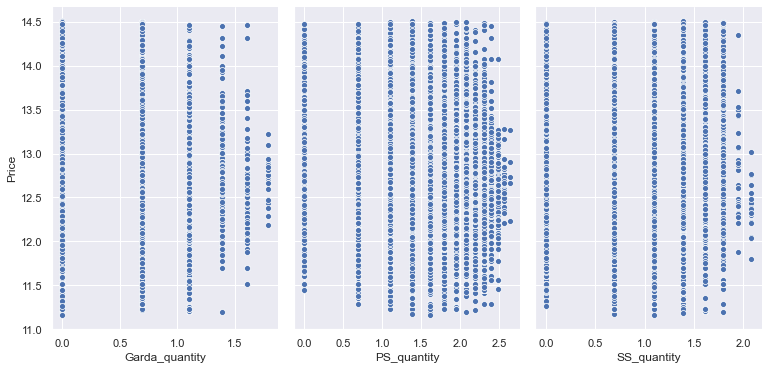

In [151]:
plt.figure(figsize=(20, 5))
sns.pairplot(df6, x_vars=['Garda_quantity','PS_quantity','SS_quantity'], y_vars='Price', size=5, aspect=0.7)

We will visualize to see how the latitude and longitude look after the changes done in the dataframe.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<Figure size 720x360 with 0 Axes>

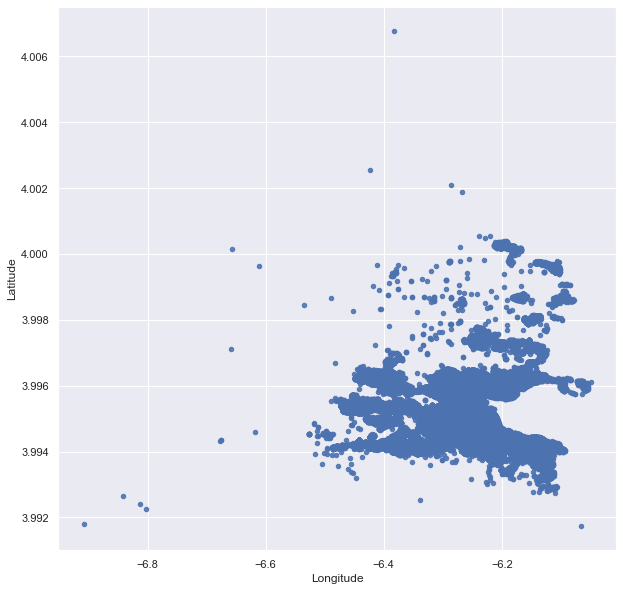

In [150]:
plt.figure(figsize=(10, 5))
df6.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.9)
plt.show()

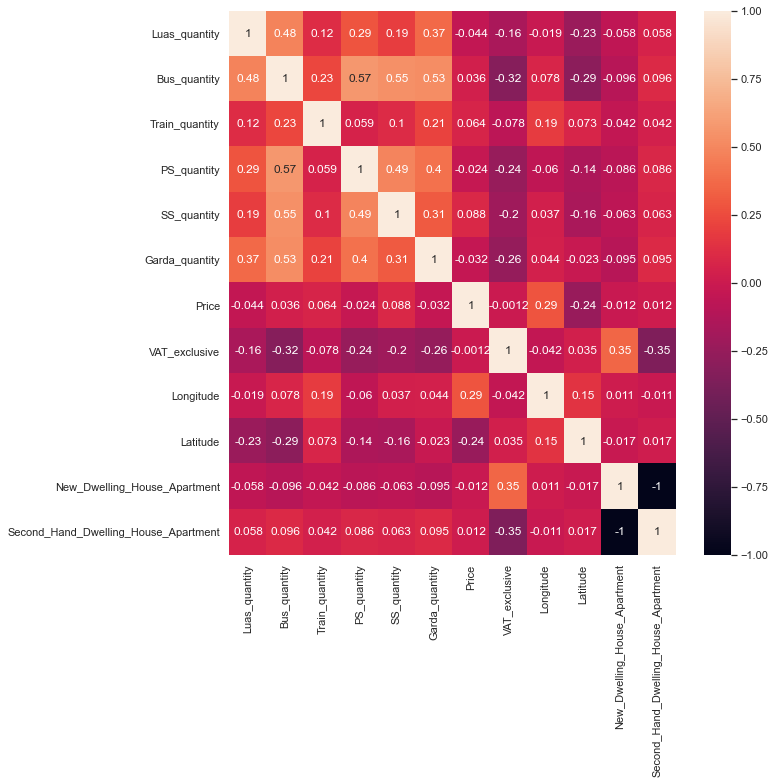

In [136]:
plt.rcParams["figure.figsize"]=10,10
corrMatrix = df6.corr()
sns.heatmap(corrMatrix, annot=True)

fig = plt.show()